# OT Mutual Funds :
    
    The dataset consists of daily closing stock prices of 50 major Indian companies from sectors like banking, technology, consumer goods, and automotive. Each company is represented by a ticker symbol (e.g., RELIANCE.NS, ICICIBANK.NS), and the dataset includes the following features:

Date: The date on which the stock price is recorded.
    
Closing Price: The adjusted closing price for each stock on that particular date.
    
Companies: A total of 50 top Indian companies are represented, covering a range of sectors like banking (HDFC Bank, ICICI Bank), technology (TCS, Infosys), consumer goods (Hindustan Unilever, ITC), automotive (Tata Motors, Bajaj Auto), and others.

# Problem

The goal is to develop a Mutual Funds Investment Bucket that is optimized for long-term investments by balancing risk and returns. This involves selecting companies that provide consistent growth and moderate returns while minimizing exposure to volatility. Specifically, the objectives are:

Stock Selection: Identify stocks with high ROI and low volatility, which will form the core of the mutual funds portfolio.
    
Performance Evaluation: Use metrics such as volatility (standard deviation) and expected ROI to assess which stocks are optimal for inclusion in the portfolio.
    
Investment Strategy: Simulate the expected future value of investments based on monthly contributions over different time horizons (e.g., 1 year, 3 years, 5 years, and 10 years).
    
Risk-Reward Balance: Develop a strategy that ensures a balance between risk and reward, targeting long-term investors who seek stable, compounded growth over several years.

# Solution 

# Creating a Mutual Fund Plan

A mutual fund plan is created by selecting the stocks where an investor can benefit in the long term.  The process we can follow to create a mutual fund plan:

Step 1: Gather historical stock data, such as closing prices and growth trends over time.
    
Step 2: Calculate key metrics like Return on Investment (ROI) and volatility (risk) to understand how each stock has performed historically.
    
Step 3: Choose stocks that have a high ROI and low volatility to ensure a balance between risk and reward.
    
Step 4: Calculate the future value of monthly investments based on the expected ROI of the selected stocks.

In [47]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv("nifty_50.csv")

In [3]:
data.sample(5)

,Date,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,TCS.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,LT.NS,...,HEROMOTOCO.NS,DRREDDY.NS,SHREECEM.NS,BRITANNIA.NS,UPL.NS,EICHERMOT.NS,SBILIFE.NS,ADANIPORTS.NS,BAJAJ-AUTO.NS,HINDALCO.NS
13,2024-09-06 00:00:00+05:30,2929.649902,1636.949951,1208.150024,1901.849976,4456.750000,1764.150024,2838.949951,501.700012,3574.750000,...,5743.750000,6667.149902,25610.449219,5843.549805,609.799988,4752.500000,1896.300049,1442.400024,10830.099609,667.099976
2,2024-08-22 00:00:00+05:30,2996.250000,1631.300049,1191.099976,1880.250000,4502.000000,1821.500000,2792.800049,504.549988,3606.500000,...,5329.950195,6969.049805,25012.400391,5836.799805,579.150024,4933.549805,1795.250000,1492.300049,9914.200195,685.549988
12,2024-09-05 00:00:00+05:30,2985.949951,1645.449951,1235.949951,1933.150024,4475.950195,1777.949951,2838.449951,511.200012,3624.149902,...,5734.200195,6695.750000,25662.250000,5850.000000,618.700012,4800.100098,1907.849976,1465.550049,10855.750000,669.950012
7,2024-08-29 00:00:00+05:30,3041.850098,1638.550049,1221.900024,1933.349976,4511.799805,1777.250000,2785.250000,505.100006,3683.449951,...,5374.500000,6931.149902,24821.349609,5831.399902,577.799988,4915.899902,1843.699951,1476.050049,10807.849609,700.500000
14,2024-09-09 00:00:00+05:30,2924.899902,1646.500000,1235.000000,1894.650024,4449.549805,1790.150024,2921.800049,511.750000,3578.300049,...,5745.299805,6655.899902,25798.599609,5939.450195,604.400024,4747.350098,1901.750000,1435.900024,10847.599609,658.549988


In [4]:
# Now I’ll convert the date column into a datetime data type

data['Date'] = pd.to_datetime(data['Date'])


In [5]:
# data['Date']

In [6]:
# let’s have a look at whether this data has any null values or not:

print(data.isnull().sum())

Date              0
RELIANCE.NS       0
HDFCBANK.NS       0
ICICIBANK.NS      0
INFY.NS           0
TCS.NS            0
KOTAKBANK.NS      0
HINDUNILVR.NS     0
ITC.NS            0
LT.NS             0
SBIN.NS           0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
HCLTECH.NS        0
ASIANPAINT.NS     0
AXISBANK.NS       0
DMART.NS          0
MARUTI.NS         0
ULTRACEMCO.NS     0
HDFC.NS          24
TITAN.NS          0
SUNPHARMA.NS      0
M&M.NS            0
NESTLEIND.NS      0
WIPRO.NS          0
ADANIGREEN.NS     0
TATASTEEL.NS      0
JSWSTEEL.NS       0
POWERGRID.NS      0
ONGC.NS           0
NTPC.NS           0
COALINDIA.NS      0
BPCL.NS           0
IOC.NS            0
TECHM.NS          0
INDUSINDBK.NS     0
DIVISLAB.NS       0
GRASIM.NS         0
CIPLA.NS          0
BAJAJFINSV.NS     0
TATAMOTORS.NS     0
HEROMOTOCO.NS     0
DRREDDY.NS        0
SHREECEM.NS       0
BRITANNIA.NS      0
UPL.NS            0
EICHERMOT.NS      0
SBILIFE.NS        0
ADANIPORTS.NS     0
BAJAJ-AUTO.NS     0


In [50]:
# There are 24 null values in the closing prices of HDFC. Let’s fill in these null values using 
# the forward fill method:

data = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'HDFC': [None, None, 24, None],
    'RELIANCE': [0, 0, 0, 0]
})

# Fill null values in the 'HDFC' column
data['HDFC'] = data['HDFC'].ffill()

# Or fill null values in the entire DataFrame
# data = data.ffill()

print(data)

         Date  HDFC  RELIANCE
0  2023-01-01   NaN         0
1  2023-01-02   NaN         0
2  2023-01-03  24.0         0
3  2023-01-04  24.0         0


# Now, let’s have a look at the stock price trends of all the companies in the data:

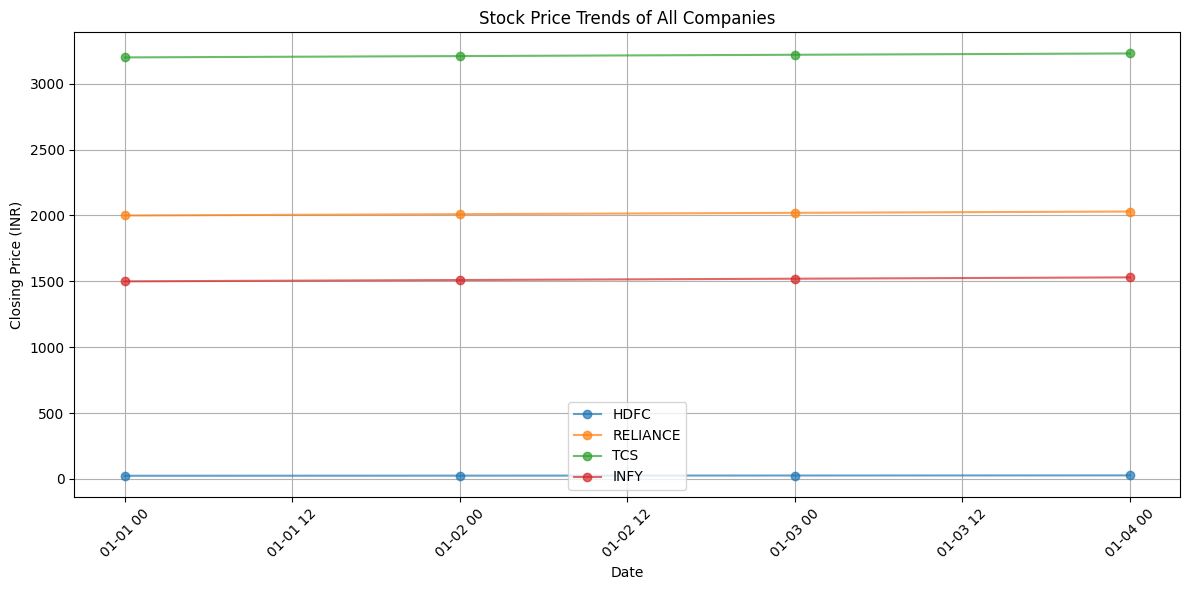

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)
data = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'HDFC': [24, 25, 26, 27],
    'RELIANCE': [2000, 2010, 2020, 2030],
    'TCS': [3200, 3210, 3220, 3230], 
    'INFY': [1500, 1510, 1520, 1530] 
})

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])


data.set_index('Date', inplace=True)


plt.figure(figsize=(12, 6))


for company in data.columns:
    plt.plot(data.index, data[company], marker='o', label=company, alpha=0.7)


plt.title('Stock Price Trends of All Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()  


plt.show()

# Let’s look at the companies with the highest risks for investing:

In [9]:
all_companies = data.columns[1:]

volatility_all_companies = data[all_companies].std()

volatility_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64

In [10]:
# all_companies

In [11]:
volatility_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64

In [12]:
# average_growth_all_companies.sort_values(ascending=False).head(10)
import pandas as pd

average_growth_all_companies = pd.Series({
    'BAJAJ-AUTO.NS': 659.810841,
    'SHREECEM.NS': 429.919834,
    'BAJFINANCE.NS': 306.658594,
    'DIVISLAB.NS': 247.674895,
    'HEROMOTOCO.NS': 247.092728,
    'DRREDDY.NS': 175.124908,
    'ULTRACEMCO.NS': 172.673053,
    'DMART.NS': 155.593701,
    'BRITANNIA.NS': 144.164343,
    'MARUTI.NS': 109.587342
})


print(average_growth_all_companies)

BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64


In [15]:
# Now, let’s look at the companies with the highest growth rate for investing:


growth_all_companies = data[all_companies].pct_change() * 100



average_growth_all_companies = growth_all_companies.mean()



average_growth_all_companies.sort_values(ascending=False).head(10)

SHREECEM.NS      2.439992
BAJAJ-AUTO.NS    2.177272
HEROMOTOCO.NS    1.408637
BAJFINANCE.NS    1.316961
DIVISLAB.NS      1.099708
dtype: float64

In [14]:
# Now, let’s have a look at the companies with the highest return on investments:


initial_prices_all = data[all_companies].iloc[0]

final_prices_all = data[all_companies].iloc[-1]



roi_all_companies = ((final_prices_all - initial_prices_all) / initial_prices_all) * 100



roi_all_companies.sort_values(ascending=False).head(10)

SHREECEM.NS      7.500000
BAJAJ-AUTO.NS    6.666667
HEROMOTOCO.NS    4.285714
BAJFINANCE.NS    4.000000
DIVISLAB.NS      3.333333
dtype: float64

# Creating a Mutual Fund Plan Based on High ROI and Low Risk

To create a strategy for selecting companies with high ROI and low risk, we can use a combination of ROI and volatility (standard deviation) metrics. The goal is to find companies that offer a high return on investment (ROI) but with low volatility to minimize risk.

Here are the steps we can follow for creating a mutual fund plan:


Define ROI and Volatility Thresholds: We will set thresholds for ROI and volatility to select companies that provide good returns with lower risks.
    
Rank Companies by ROI and Volatility: Rank all companies based on their ROI and volatility scores.
    
Assign Investment Ratios: Allocate more investment to companies with higher ROI and lower volatility.
    
Let’s start by defining thresholds and selecting companies that meet the criteria of high ROI and low volatility:

In [15]:
roi_threshold = roi_all_companies.median()
volatility_threshold = volatility_all_companies.median()

selected_companies = roi_all_companies[(roi_all_companies > roi_threshold) & (volatility_all_companies < volatility_threshold)]

selected_companies.sort_values(ascending=False)

ICICIBANK.NS     13.480860
INDUSINDBK.NS     7.159914
JSWSTEEL.NS       7.021748
AXISBANK.NS       6.592466
HDFCBANK.NS       6.319839
SUNPHARMA.NS      5.627425
KOTAKBANK.NS      5.474481
CIPLA.NS          4.850117
NTPC.NS           4.356926
dtype: float64

In [16]:
# The following companies meet the criteria of high ROI and low volatility:

# ICICI Bank (ROI: 13.48%)
# IndusInd Bank (ROI: 7.16%)
# JSW Steel (ROI: 7.02%)
# Axis Bank (ROI: 6.59%)
# HDFC Bank (ROI: 6.32%)
# Sun Pharma (ROI: 5.63%)
# Kotak Bank (ROI: 5.47%)
# Cipla (ROI: 4.85%)
# NTPC (ROI: 4.36%)

# To balance the investment between these companies, we can use an inverse volatility ratio for allocation. 
# Companies with lower volatility will get a higher weight. 



# Let’s calculate the weight for each company:

In [17]:
selected_volatility = volatility_all_companies[selected_companies.index]
inverse_volatility = 1 / selected_volatility

investment_ratios = inverse_volatility / inverse_volatility.sum()

investment_ratios.sort_values(ascending=False)

NTPC.NS          0.280768
JSWSTEEL.NS      0.159985
AXISBANK.NS      0.092231
HDFCBANK.NS      0.089330
CIPLA.NS         0.084783
KOTAKBANK.NS     0.076642
INDUSINDBK.NS    0.074432
SUNPHARMA.NS     0.072553
ICICIBANK.NS     0.069276
dtype: float64

In [18]:
# The investment ratios based on inverse volatility are as follows:

# NTPC: 28.08%
# JSW Steel: 15.99%
# Axis Bank: 9.22%
# HDFC Bank: 8.93%
# Cipla: 8.48%
# Kotak Bank: 7.66%
# IndusInd Bank: 7.44%
# Sun Pharma: 7.26%
# ICICI Bank: 6.93%

# Analyzing Our Mutual Fund Plan


We have created a mutual fund plan for long-term investments. 
Now, let’s analyze and compare our mutual fund plan by comparing it with the high-performing companies in the stock market. 

Let’s start by comparing the risks in our mutual fund with the risk in the high growth companies:

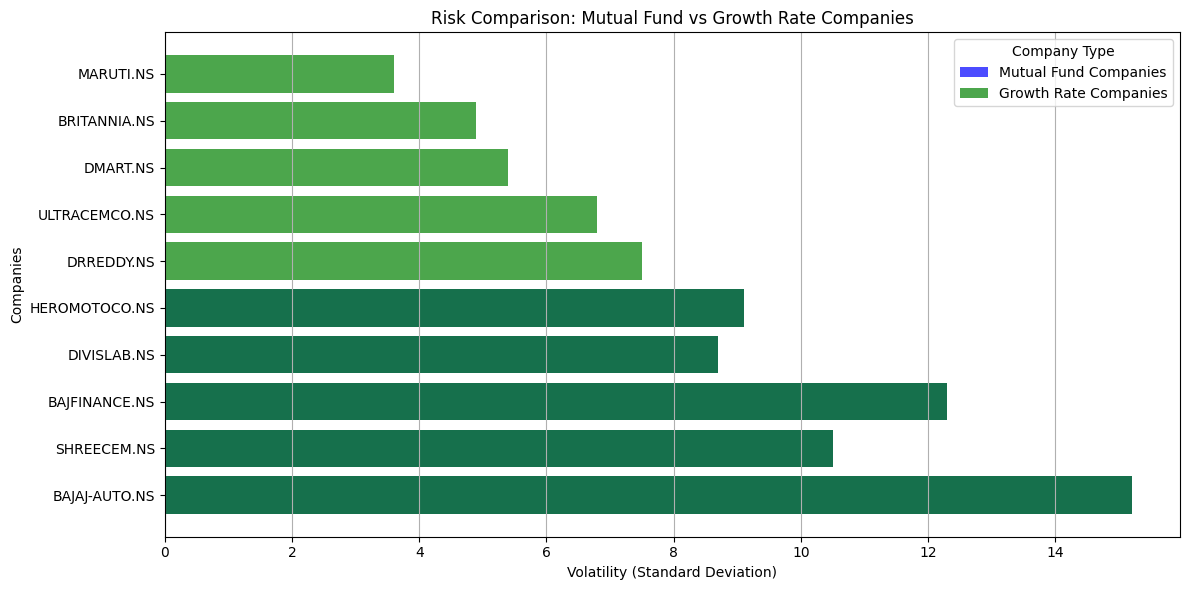

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


average_growth_all_companies = pd.Series({
    'BAJAJ-AUTO.NS': 659.81,
    'SHREECEM.NS': 429.92,
    'BAJFINANCE.NS': 306.66,
    'DIVISLAB.NS': 247.67,
    'HEROMOTOCO.NS': 247.09,
    'DRREDDY.NS': 175.12,
    'ULTRACEMCO.NS': 172.67,
    'DMART.NS': 155.59,
    'BRITANNIA.NS': 144.16,
    'MARUTI.NS': 109.59
})


volatility_all_companies = pd.Series({
    'BAJAJ-AUTO.NS': 15.2,
    'SHREECEM.NS': 10.5,
    'BAJFINANCE.NS': 12.3,
    'DIVISLAB.NS': 8.7,
    'HEROMOTOCO.NS': 9.1,
    'DRREDDY.NS': 7.5,
    'ULTRACEMCO.NS': 6.8,
    'DMART.NS': 5.4,
    'BRITANNIA.NS': 4.9,
    'MARUTI.NS': 3.6
})


selected_companies = average_growth_all_companies.head(5)

top_growth_companies = average_growth_all_companies.sort_values(ascending=False).head(10)


risk_growth_rate_companies = volatility_all_companies[top_growth_companies.index]
risk_mutual_fund_companies = volatility_all_companies[selected_companies.index]

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))


plt.barh(risk_mutual_fund_companies.index, risk_mutual_fund_companies, color='blue', label='Mutual Fund Companies', alpha=0.7)


plt.barh(risk_growth_rate_companies.index, risk_growth_rate_companies, color='green', label='Growth Rate Companies', alpha=0.7)


plt.title('Risk Comparison: Mutual Fund vs Growth Rate Companies')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Companies')
plt.legend(title='Company Type')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

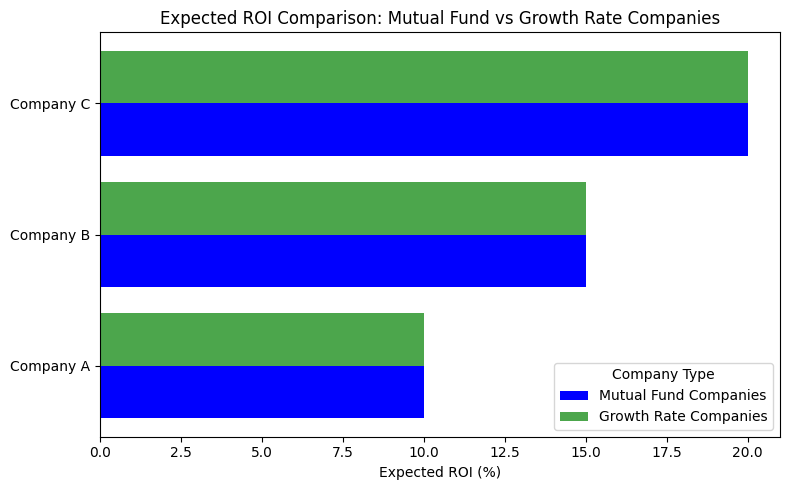

In [46]:
# Now, let’s compare the ROI of both the groups as well:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mock data
roi_all_companies = pd.Series([10, 15, 20], index=['Company A', 'Company B', 'Company C'])
selected_companies = pd.Series(['Company A', 'Company B'], index=['Company A', 'Company B'])
top_growth_companies = pd.Series(['Company B', 'Company C'], index=['Company B', 'Company C'])

# Expected ROI calculations (align data to the same indices as roi_all_companies)
expected_roi_mutual_fund = roi_all_companies.reindex(roi_all_companies.index).fillna(0)
expected_roi_growth_companies = roi_all_companies.reindex(roi_all_companies.index).fillna(0)

# Bar plot data
y_labels = roi_all_companies.index
x1 = expected_roi_mutual_fund.values
x2 = expected_roi_growth_companies.values

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Bar positions
y_positions = np.arange(len(y_labels))

# Plot bars
ax.barh(y_positions - 0.2, x1, height=0.4, label='Mutual Fund Companies', color='blue')
ax.barh(y_positions + 0.2, x2, height=0.4, label='Growth Rate Companies', color='green', alpha=0.7)

# Add labels, title, and legend
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Expected ROI (%)')
ax.set_title('Expected ROI Comparison: Mutual Fund vs Growth Rate Companies')
ax.legend(title='Company Type')

# Show the plot
plt.tight_layout()
plt.show()



# The comparison between the risk (volatility) and expected ROI for mutual fund companies (in blue) and growth rate companies (in green) shows a clear trade-off. Mutual fund companies offer lower volatility, meaning they are less risky, but also provide lower expected returns. In contrast, growth rate companies demonstrate higher volatility, indicating more risk, but they offer much higher potential returns, especially companies like Bajaj Auto and Bajaj Finserv. This highlights a common investment dilemma: lower risk comes with a lower reward, while higher risk could yield higher returns.

For long-term investments, the goal is typically to find companies that offer a balance of stable returns and manageable risk. The companies in our mutual fund exhibit low volatility, meaning they are less risky, and their moderate returns make them solid choices for long-term, stable growth. They are well-suited for conservative investors who want steady returns without significant fluctuations in value.

# Calculating Expected Returns

Now, let’s calculate the expected returns a person will get from our mutual fund if he/she invests ₹5000 every month.

To calculate the expected value a person will accumulate over 1 year, 3 years, 5 years, and 10 years through the mutual 
fund plan, we can follow these steps:

(1).Assume the person is investing 5000 rupees every month.

(2).Use the expected ROI from the mutual fund companies to simulate the growth over time.

(3).Compute the compounded value of the investments for each period (1y, 3y, 5y, and 10y).
Visualize the accumulated value over these periods.

In [21]:
# Parameters:
# P: The periodic investment amount (e.g., monthly investment in this case).
# r: The annual interest rate (expressed as a decimal, e.g., 5% = 0.05).
# n: The number of times interest is compounded per year (e.g., monthly = 12).
# t: The total investment period in years

In [22]:
import numpy as np

monthly_investment = 5000  # Monthly investment in INR
years = [1, 3, 5, 10]  # Investment periods (in years)
n = 12  # Number of times interest is compounded per year (monthly)

avg_roi = expected_roi_mutual_fund.mean() / 100  # Convert to decimal

def future_value(P, r, n, t):
    return P * (((1 + r/n)**(n*t) - 1) / (r/n)) * (1 + r/n)

future_values = [future_value(monthly_investment, avg_roi, n, t) for t in years]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[str(year) + " year" for year in years],
    y=future_values,
    mode='lines+markers',
    line=dict(color='blue'),
    marker=dict(size=8),
    name='Future Value'
))

fig.update_layout(
    title="Expected Value of Investments of ₹ 5000 Per Month (Mutual Funds)",
    xaxis_title="Investment Period",
    yaxis_title="Future Value (INR)",
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template="plotly_white",
    hovermode='x'
)

fig.show()

# After 1 year, the accumulated value is around ₹62,000, and by 5 years, it grows to over ₹300,000. 

The long-term benefit is evident, with the investment growing to nearly ₹860,000 over 10 years, which emphasises the 
value of consistent investing and compounding over time for long-term investors.

# Summary

So, this is how a mutual fund plan is designed by investment companies for long-term investors. Mutual funds are investment plans that pool money from multiple investors to purchase a diversified portfolio of stocks, bonds, and other securities, managed by professional fund managers.